# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Thermal Conductivity Dataset](https://www.kaggle.com/datasets/ai4a-lab/nanofluid-thermal-conductivity-prediction/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/kaggle/input/nanofluid-thermal-conductivity-prediction/Dataset_Thermal_Conductivity.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('Dataset_Thermal_Conductivity.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,Particle Material,Base Fluid,Temperature (°C),Particle Size (nm),Particle Volume Fraction (in %),Thermal Conductivity of Liquid (km),Thermal Conductivity of Particle (kp),Exp-TC,KKL-TC
0,Al₂O₃,Water,20,150,0.5,0.5984,27,0.607376,0.993655
1,Al₂O₃,Water,30,150,0.5,0.6155,27,0.630888,0.991569
2,Al₂O₃,Water,40,150,0.5,0.6306,27,0.649518,0.989927
3,Al₂O₃,Water,50,150,0.5,0.6436,27,0.671275,0.988566
4,Al₂O₃,Water,20,150,1.0,0.5984,27,0.613360,0.989888


## last Five row

In [4]:
df.tail()

,Particle Material,Base Fluid,Temperature (°C),Particle Size (nm),Particle Volume Fraction (in %),Thermal Conductivity of Liquid (km),Thermal Conductivity of Particle (kp),Exp-TC,KKL-TC
273,Al,Transformer Oil,30,80,2.0,0.110,204,0.132000,0.730688
274,Al,Transformer Oil,40,80,2.0,0.109,204,0.132435,0.679104
275,Al,Transformer Oil,50,80,2.0,0.108,204,0.133380,0.633366
276,Al,Transformer Oil,20,80,3.0,0.111,204,0.131535,0.729406
277,Al,Transformer Oil,30,80,3.0,0.110,204,0.136400,0.647471


## Shape of our dataset

In [5]:
df.shape

(278, 9)

## List out all columns

In [6]:
df.columns

Index(['Particle Material', 'Base Fluid', 'Temperature (°C)',
       'Particle Size (nm)', 'Particle Volume Fraction (in %)',
       'Thermal Conductivity of Liquid (km)',
       'Thermal Conductivity of Particle (kp)', 'Exp-TC', 'KKL-TC'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

Particle Material                         object
Base Fluid                                object
Temperature (°C)                           int64
Particle Size (nm)                         int64
Particle Volume Fraction (in %)          float64
Thermal Conductivity of Liquid (km)      float64
Thermal Conductivity of Particle (kp)      int64
Exp-TC                                   float64
KKL-TC                                   float64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Particle Material                      278 non-null    object 
 1   Base Fluid                             278 non-null    object 
 2   Temperature (°C)                       278 non-null    int64  
 3   Particle Size (nm)                     278 non-null    int64  
 4   Particle Volume Fraction (in %)        278 non-null    float64
 5   Thermal Conductivity of Liquid (km)    278 non-null    float64
 6   Thermal Conductivity of Particle (kp)  278 non-null    int64  
 7   Exp-TC                                 278 non-null    float64
 8   KKL-TC                                 278 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 19.7+ KB


## Check Null Value

In [9]:
df.isnull().sum()

Particle Material                        0
Base Fluid                               0
Temperature (°C)                         0
Particle Size (nm)                       0
Particle Volume Fraction (in %)          0
Thermal Conductivity of Liquid (km)      0
Thermal Conductivity of Particle (kp)    0
Exp-TC                                   0
KKL-TC                                   0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,Temperature (°C),Particle Size (nm),Particle Volume Fraction (in %),Thermal Conductivity of Liquid (km),Thermal Conductivity of Particle (kp),Exp-TC,KKL-TC
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,34.928058,65.611511,1.483453,0.355188,139.208633,0.397025,0.920235
std,11.200271,39.199851,1.009814,0.214387,146.251525,0.237714,0.090127
min,20.000000,11.000000,0.100000,0.108000,18.000000,0.113360,0.531106
25%,22.500000,31.000000,0.500000,0.145475,27.000000,0.174814,0.891490
50%,30.000000,80.000000,1.000000,0.255900,27.000000,0.293664,0.953987
75%,40.000000,80.000000,2.000000,0.615500,204.000000,0.664224,0.982150
max,50.000000,150.000000,3.000000,0.643600,383.000000,0.855988,1.004037


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

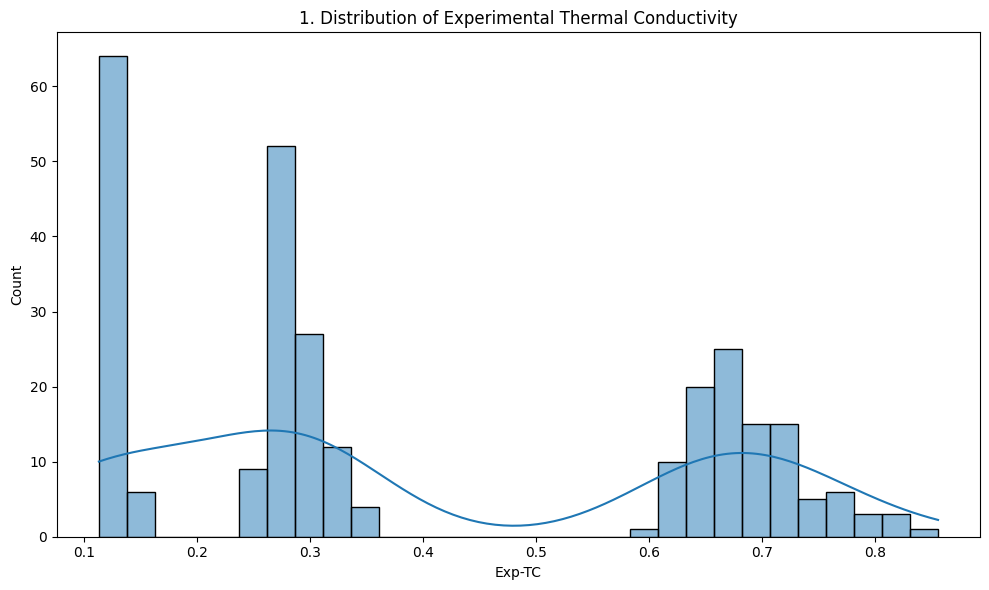

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['Exp-TC'], kde=True, bins=30)
plt.title(f'{plot_no}. Distribution of Experimental Thermal Conductivity')
show_fig()
plot_no += 1


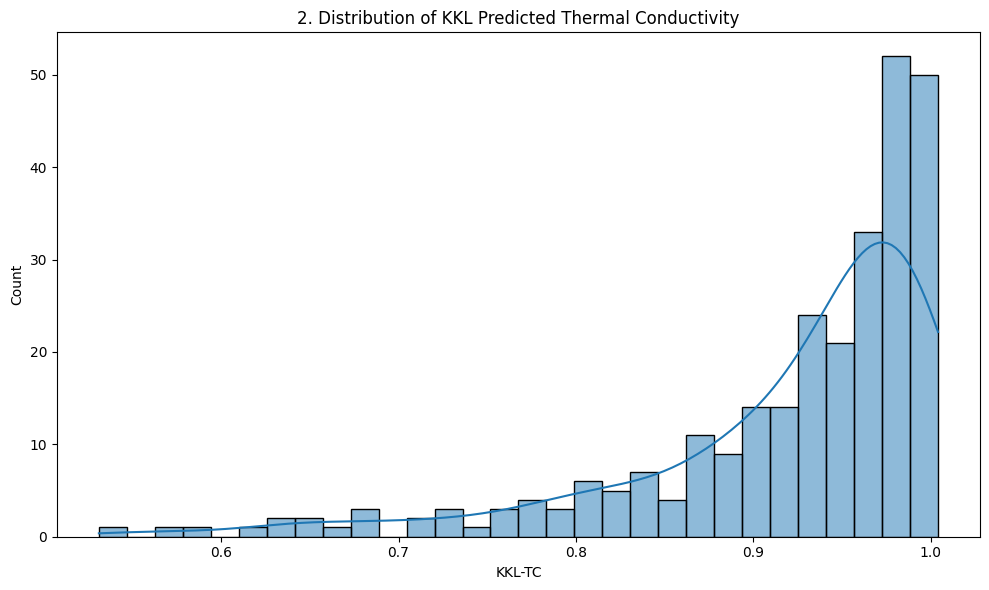

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['KKL-TC'], kde=True, bins=30)
plt.title(f'{plot_no}. Distribution of KKL Predicted Thermal Conductivity')
show_fig()
plot_no += 1


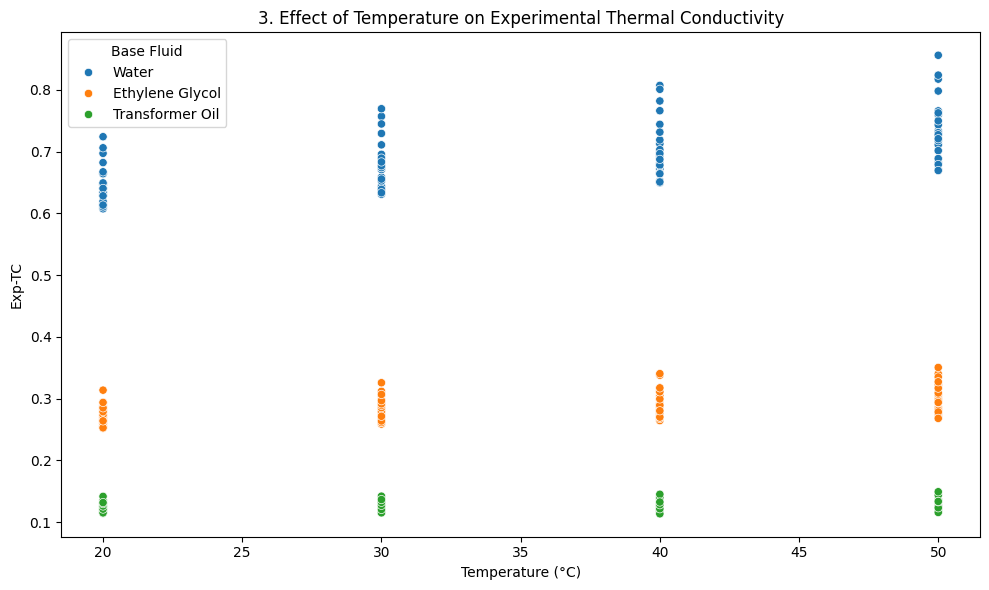

In [15]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Temperature (°C)', y='Exp-TC', hue='Base Fluid')
plt.title(f'{plot_no}. Effect of Temperature on Experimental Thermal Conductivity')
show_fig()
plot_no += 1


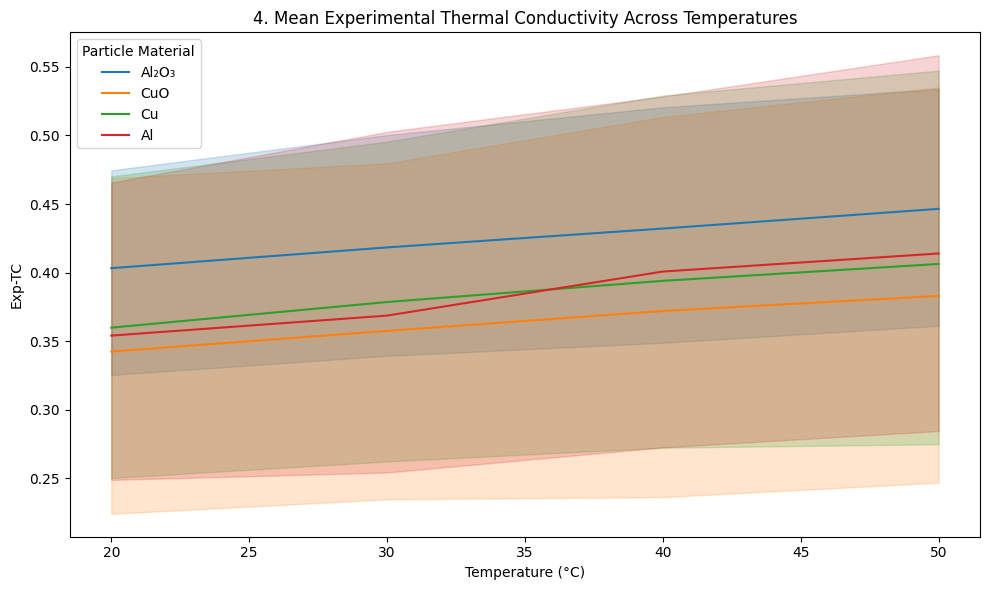

In [16]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Temperature (°C)', y='Exp-TC', hue='Particle Material', estimator='mean')
plt.title(f'{plot_no}. Mean Experimental Thermal Conductivity Across Temperatures')
show_fig()
plot_no += 1


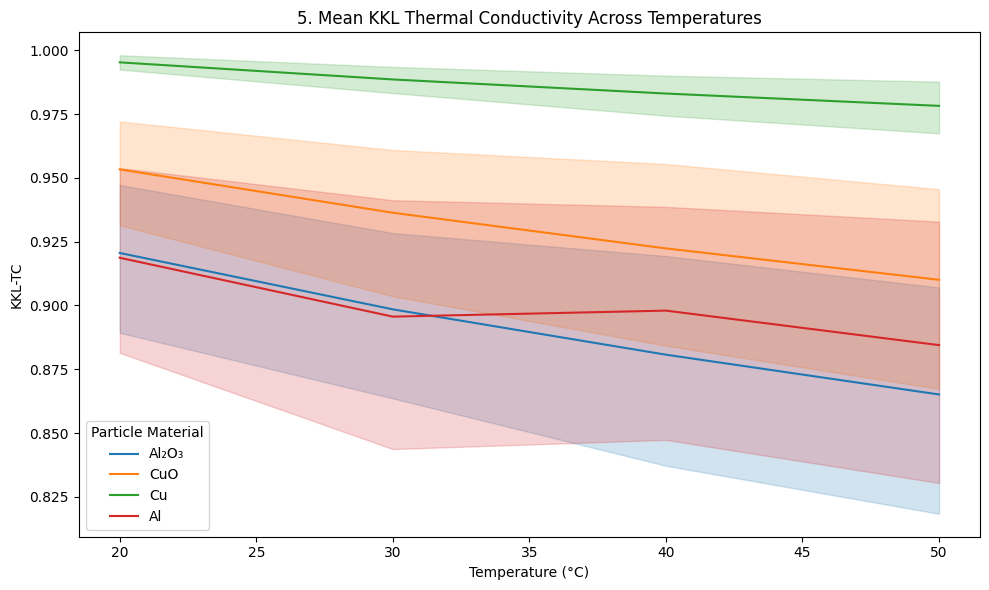

In [17]:
fig = plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Temperature (°C)', y='KKL-TC', hue='Particle Material', estimator='mean')
plt.title(f'{plot_no}. Mean KKL Thermal Conductivity Across Temperatures')
show_fig()
plot_no += 1


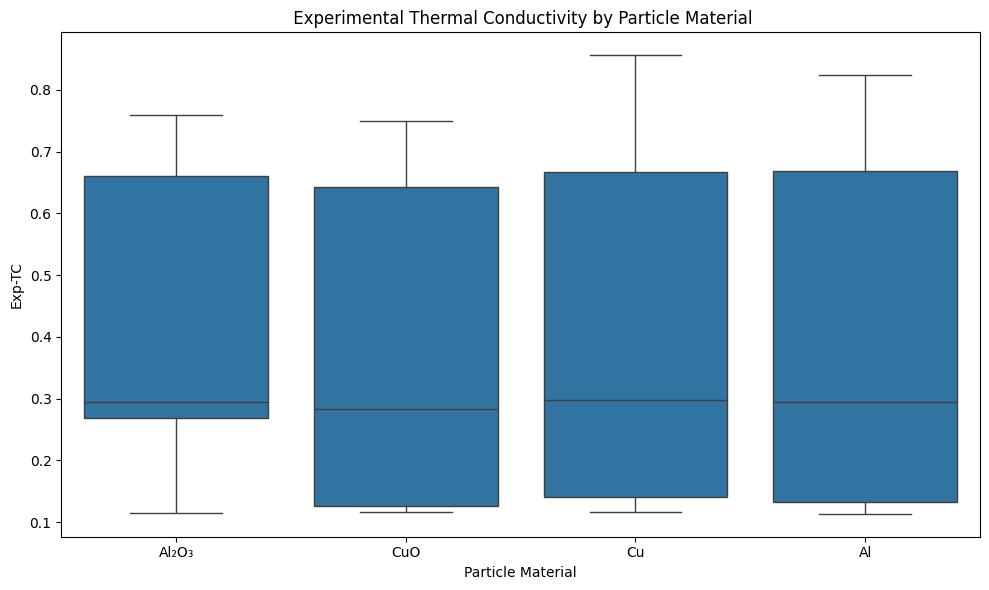

In [18]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Particle Material', y='Exp-TC')
plt.title(' Experimental Thermal Conductivity by Particle Material')
show_fig()
plot_no += 1


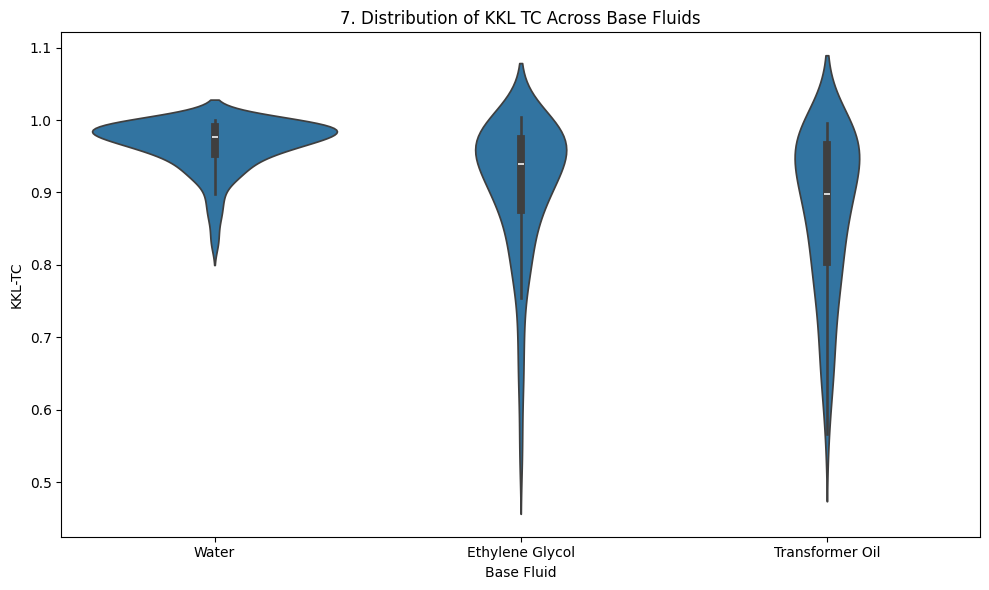

In [19]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Base Fluid', y='KKL-TC')
plt.title(f'{plot_no}. Distribution of KKL TC Across Base Fluids')
show_fig()
plot_no += 1


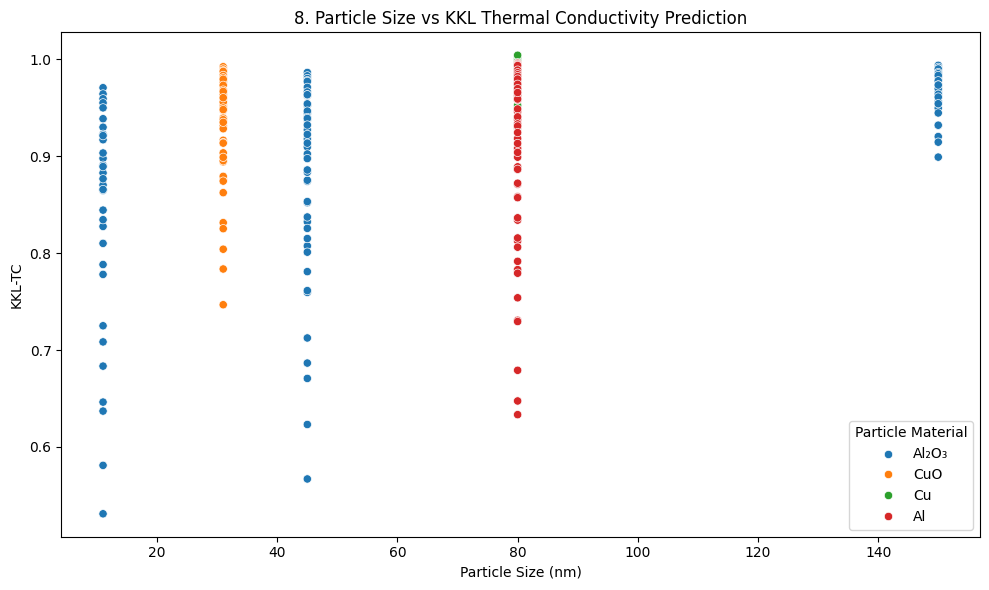

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Particle Size (nm)', y='KKL-TC', hue='Particle Material')
plt.title(f'{plot_no}. Particle Size vs KKL Thermal Conductivity Prediction')
show_fig()
plot_no += 1


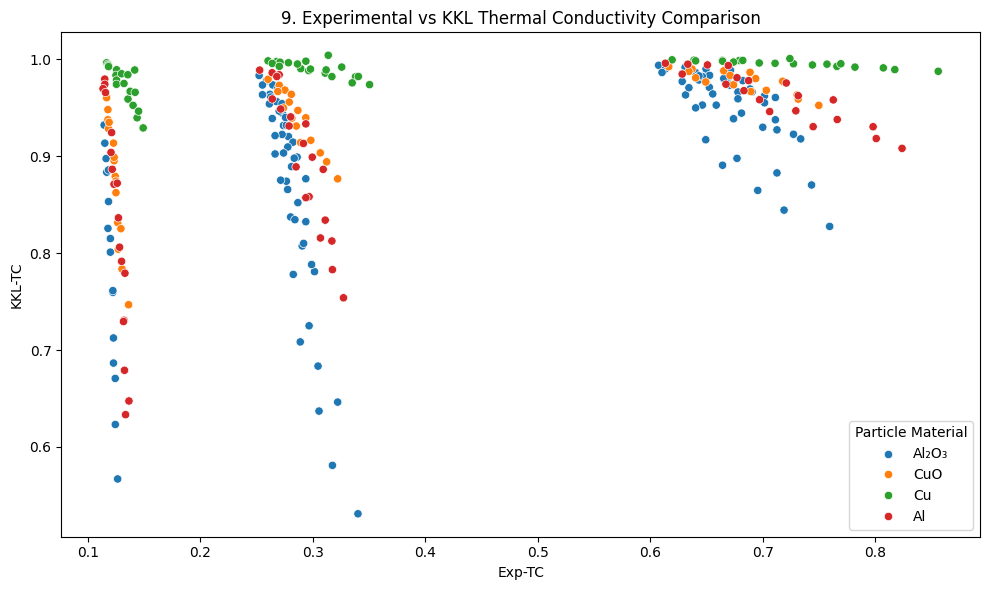

In [21]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Exp-TC', y='KKL-TC', hue='Particle Material')
plt.title(f'{plot_no}. Experimental vs KKL Thermal Conductivity Comparison')
show_fig()
plot_no += 1


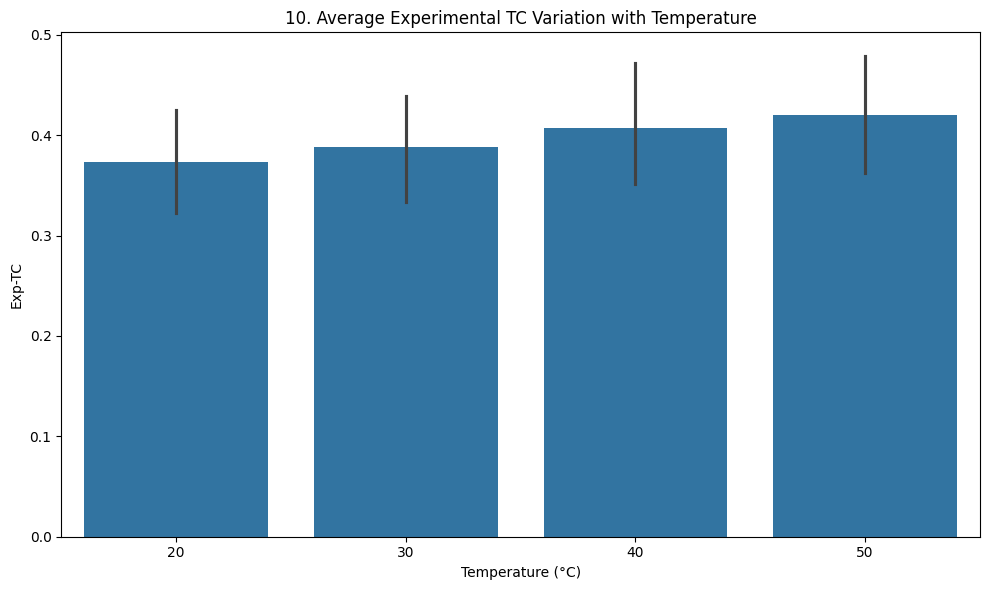

In [22]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Temperature (°C)', y='Exp-TC', estimator='mean')
plt.title(f'{plot_no}. Average Experimental TC Variation with Temperature')
show_fig()
plot_no += 1


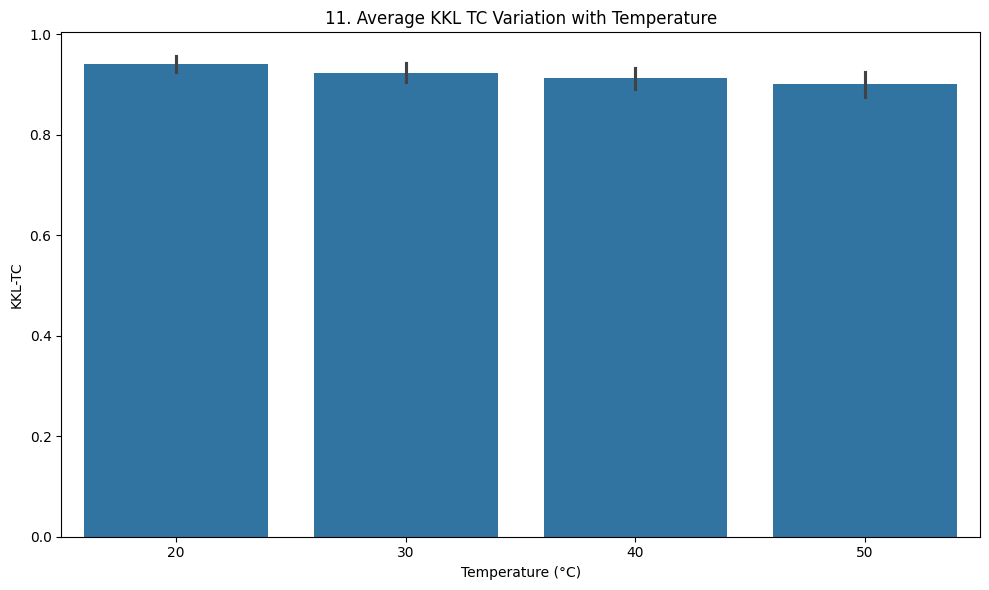

In [23]:
fig = plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Temperature (°C)', y='KKL-TC', estimator='mean')
plt.title(f'{plot_no}. Average KKL TC Variation with Temperature')
show_fig()
plot_no += 1


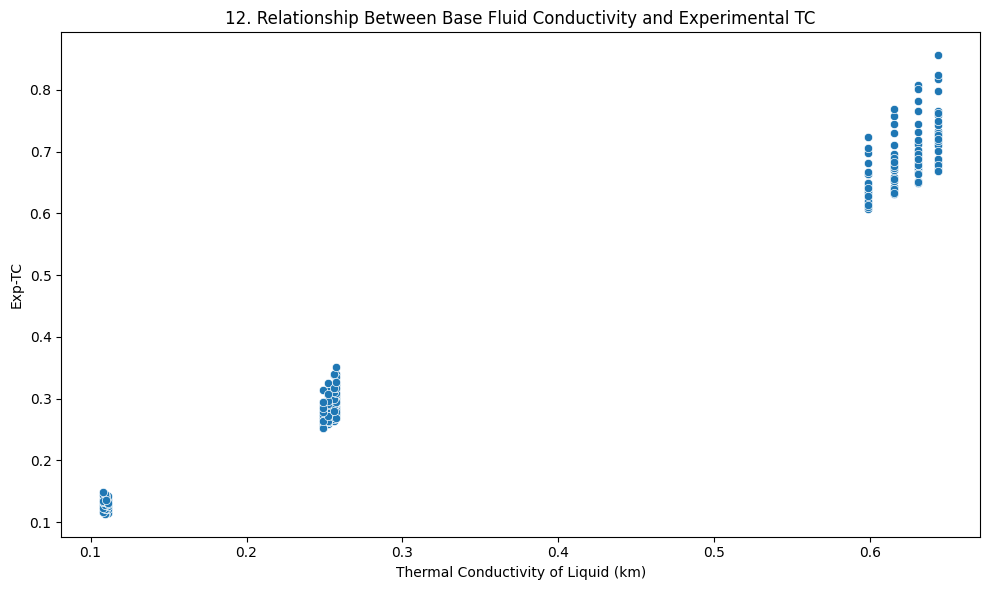

In [24]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Thermal Conductivity of Liquid (km)', y='Exp-TC')
plt.title(f'{plot_no}. Relationship Between Base Fluid Conductivity and Experimental TC')
show_fig()
plot_no += 1


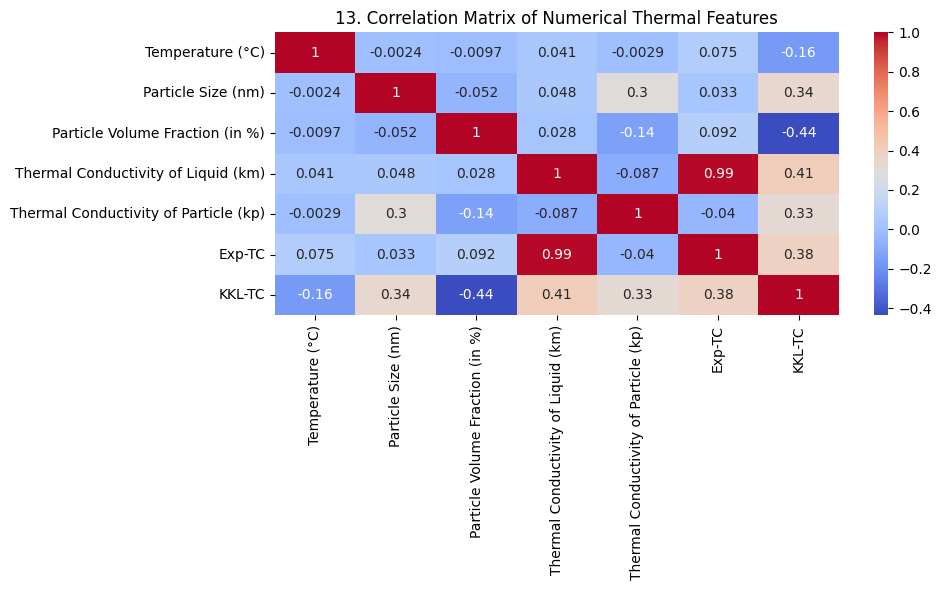

In [25]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Matrix of Numerical Thermal Features')
show_fig()
plot_no += 1


# Model Training

## Separate features and target

In [26]:
X = df.drop('Exp-TC', axis=1)
y = df['Exp-TC']

## Identify categorical and numerical columns

In [27]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

## Label Encoding for categorical features

In [28]:
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])

## Feature Scaling for numerical features

In [29]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

## Train-test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train Linear Regression model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Make predictions

In [32]:
y_pred = model.predict(X_test)

## Model evaluation

In [33]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2 Score: 0.9957557395361605
MAE: 0.01272204726153725
RMSE: 0.016085189611920053


## Actual vs Predicted visualization

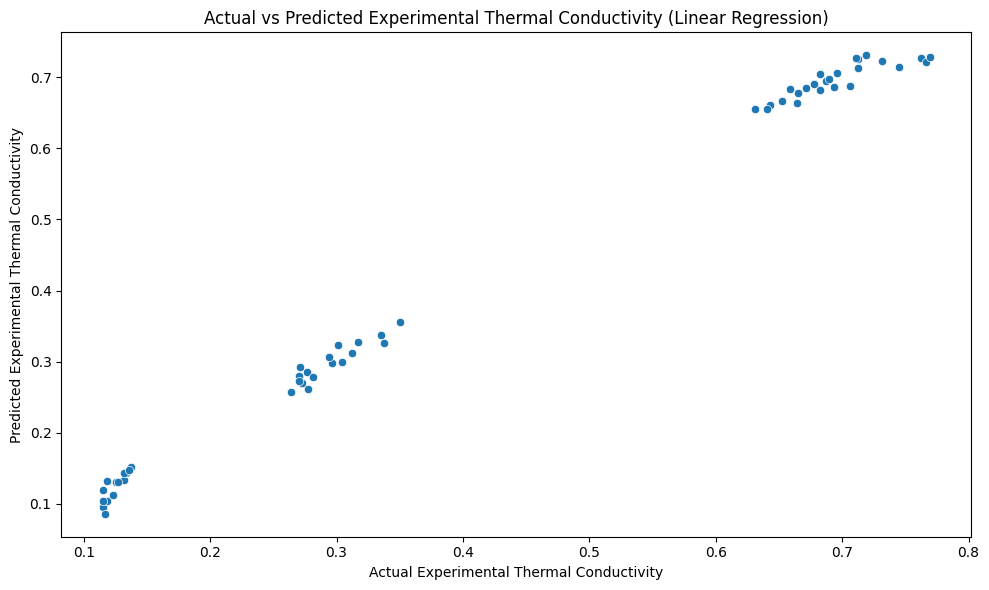

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Experimental Thermal Conductivity")
plt.ylabel("Predicted Experimental Thermal Conductivity")
plt.title("Actual vs Predicted Experimental Thermal Conductivity (Linear Regression)")
plt.tight_layout()
plt.show()